In [9]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

In [10]:
# 1000 by 1000 grid
N = 250

In [11]:
init_random = np.random.random((N,N))
lattice_n = np.zeros((N, N))
lattice_n[init_random>=0.75] = 1
lattice_n[init_random<0.75] = -1

init_random = np.random.random((N,N))
lattice_p = np.zeros((N, N))
lattice_p[init_random>=0.25] = 1
lattice_p[init_random<0.25] = -1

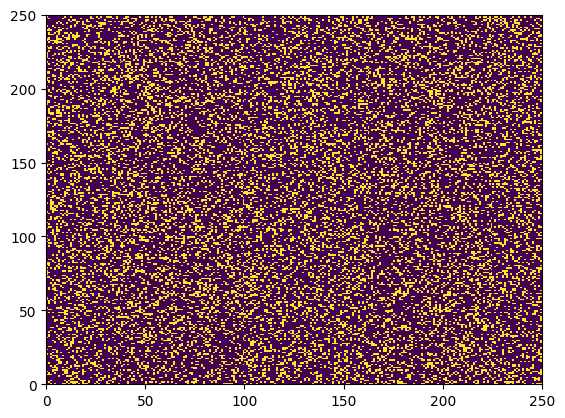

In [12]:
plt.pcolormesh(lattice_n)


In [13]:
def get_energy_arr(lattice):
    # applies the nearest neighbours summation
    kern = generate_binary_structure(2, 1) 
    kern[1][1] = False
    arr = -lattice * convolve(lattice, kern, mode='constant', cval=0)
    return arr

def get_energy(lattice):
    return get_energy_arr(lattice).sum()

def get_dE_arr(lattices):
    return -2*get_energy_arr(lattices)

In [14]:

def metropolis(spin_arr, n_iters, BJ):
    energies = []
    avg_spins = []
    spin_arr = spin_arr.copy()
    for t in range(n_iters):
        i = np.random.randint(0,2)
        j = np.random.randint(0,2)
        dE = get_dE_arr(spin_arr)[i::2,j::2]
        change = (dE>=0)*(np.random.random(dE.shape) < np.exp(-BJ*dE)) + (dE<0)
        spin_arr[i::2,j::2][change] *=-1
        energies.append(get_energy(spin_arr))
        avg_spins.append(spin_arr.sum()/N**2)
    return np.array(avg_spins), np.array(energies)

In [15]:
spins, energies = metropolis(lattice_p, 1000, 0.5)

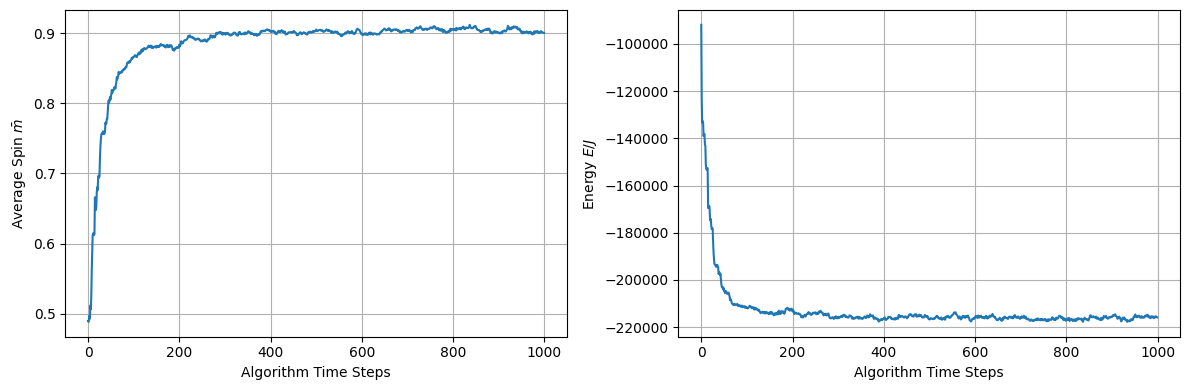

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(spins)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
plt.show()

In [17]:
def get_spin_energy(lattice, BJs):
    spins_avg = []
    energies_avg = []
    energies_std = []
    for BJ in BJs:
        spins, energies = metropolis(lattice, 1000, BJ)
        spins_avg.append(np.mean(spins[-400:]))
        energies_avg.append(np.mean(energies[-400:]))
        energies_std.append(np.std(energies[-400:]))
        #spins, energies = metropolis(lattice, 1000, BJ)
    return np.array(spins_avg), np.array(energies_avg), np.array(energies_std)

#B is temperature,  J is interaction strength
BJs = 1/np.linspace(1, 3, 10)
spins_avg_n, E_means_n, E_stds_n = get_spin_energy(lattice_n, BJs)
spins_avg_p, E_means_p, E_stds_p = get_spin_energy(lattice_p, BJs)

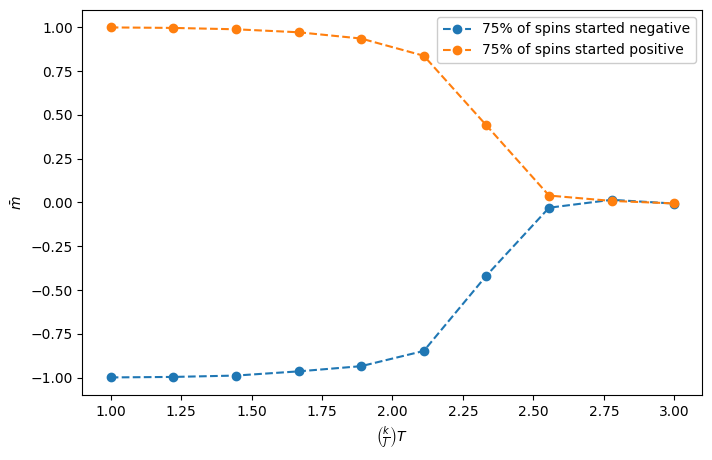

In [18]:
plt.figure(figsize=(8,5))
plt.plot(1/BJs, spins_avg_n, 'o--', label='75% of spins started negative')
plt.plot(1/BJs, spins_avg_p, 'o--', label='75% of spins started positive')
plt.xlabel(r'$\left(\frac{k}{J}\right)T$')
plt.ylabel(r'$\bar{m}$')
plt.legend(facecolor='white', framealpha=1)
plt.show()

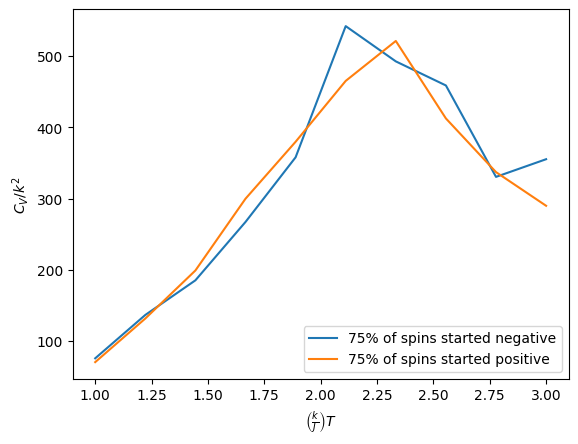

In [19]:
plt.plot(1/BJs, E_stds_n*BJs, label='75% of spins started negative')
plt.plot(1/BJs, E_stds_p*BJs, label='75% of spins started positive')
plt.xlabel(r'$\left(\frac{k}{J}\right)T$')
plt.ylabel(r'$C_V / k^2$')
plt.legend()
plt.show()

In [49]:
B_range = np.linspace(5, 10, 10)  # Example range of temperatures (B)
J_range = np.linspace(0, 5.0, 10)  # Example range of interaction strengths (J)

# Initialize lists to store results
results = []

# Perform grid search
for J in J_range:
    BJs = J/B_range
    spins_avg_n, E_means_n, E_stds_n = get_spin_energy(lattice_n, BJs)
    spins_avg_p, E_means_p, E_stds_p = get_spin_energy(lattice_p, BJs)
    results.append({
        'J': J,
        'B_range': B_range,
        'spins_avg_n': spins_avg_n,
        'E_means_n': E_means_n,
        'E_stds_n': E_stds_n,
        'spins_avg_p': spins_avg_p,
        'E_means_p': E_means_p,
        'E_stds_p': E_stds_p
    })

0.0
5.0, 5.555555555555555, 6.111111111111111, 6.666666666666667, 7.222222222222222, 7.777777777777778, 8.333333333333334, 8.88888888888889, 9.444444444444445, 10.0
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0


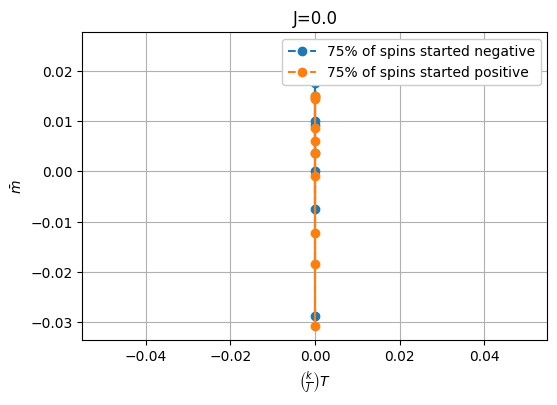

0.5555555555555556
5.0, 5.555555555555555, 6.111111111111111, 6.666666666666667, 7.222222222222222, 7.777777777777778, 8.333333333333334, 8.88888888888889, 9.444444444444445, 10.0
0.11111111111111112, 0.1, 0.09090909090909093, 0.08333333333333333, 0.07692307692307693, 0.07142857142857144, 0.06666666666666667, 0.0625, 0.058823529411764705, 0.05555555555555556


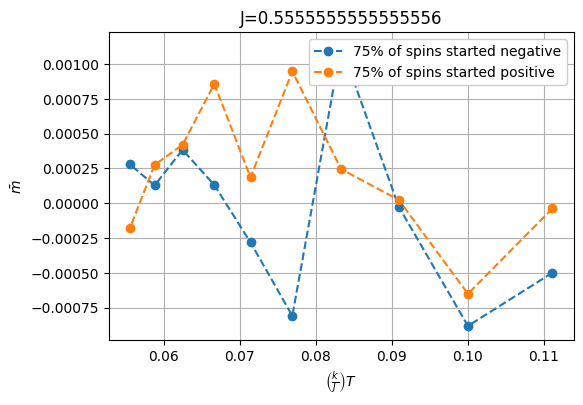

1.1111111111111112
5.0, 5.555555555555555, 6.111111111111111, 6.666666666666667, 7.222222222222222, 7.777777777777778, 8.333333333333334, 8.88888888888889, 9.444444444444445, 10.0
0.22222222222222224, 0.2, 0.18181818181818185, 0.16666666666666666, 0.15384615384615385, 0.14285714285714288, 0.13333333333333333, 0.125, 0.11764705882352941, 0.11111111111111112


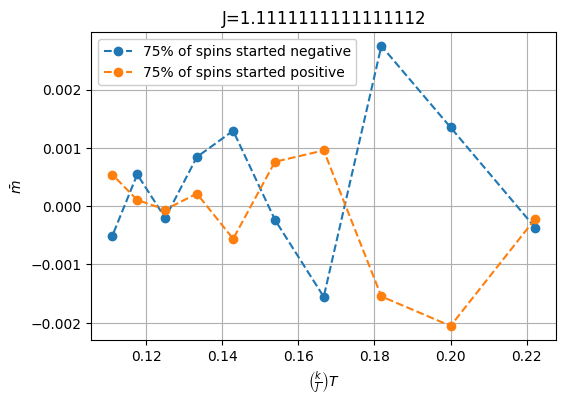

1.6666666666666667
5.0, 5.555555555555555, 6.111111111111111, 6.666666666666667, 7.222222222222222, 7.777777777777778, 8.333333333333334, 8.88888888888889, 9.444444444444445, 10.0
0.33333333333333337, 0.30000000000000004, 0.27272727272727276, 0.25, 0.23076923076923078, 0.2142857142857143, 0.19999999999999998, 0.1875, 0.17647058823529413, 0.16666666666666669


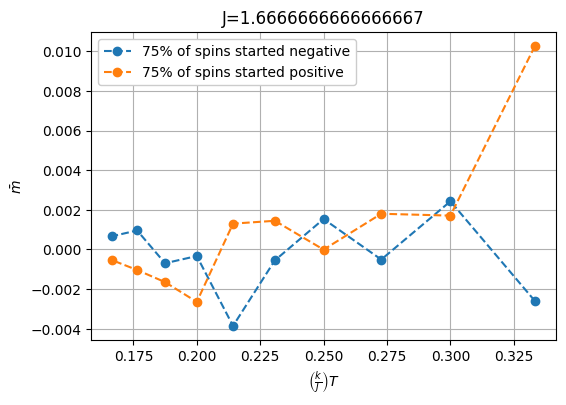

2.2222222222222223
5.0, 5.555555555555555, 6.111111111111111, 6.666666666666667, 7.222222222222222, 7.777777777777778, 8.333333333333334, 8.88888888888889, 9.444444444444445, 10.0
0.4444444444444445, 0.4, 0.3636363636363637, 0.3333333333333333, 0.3076923076923077, 0.28571428571428575, 0.26666666666666666, 0.25, 0.23529411764705882, 0.22222222222222224


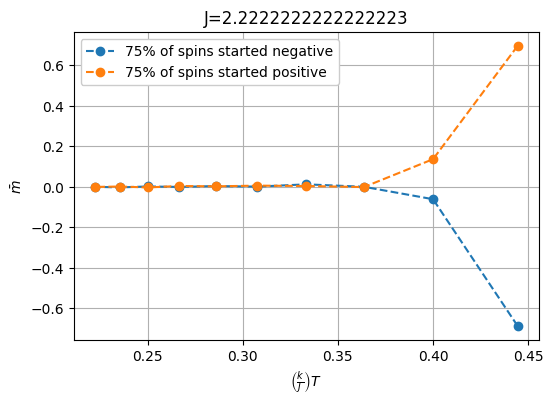

2.7777777777777777
5.0, 5.555555555555555, 6.111111111111111, 6.666666666666667, 7.222222222222222, 7.777777777777778, 8.333333333333334, 8.88888888888889, 9.444444444444445, 10.0
0.5555555555555556, 0.5, 0.4545454545454546, 0.41666666666666663, 0.3846153846153846, 0.35714285714285715, 0.3333333333333333, 0.3125, 0.29411764705882354, 0.2777777777777778


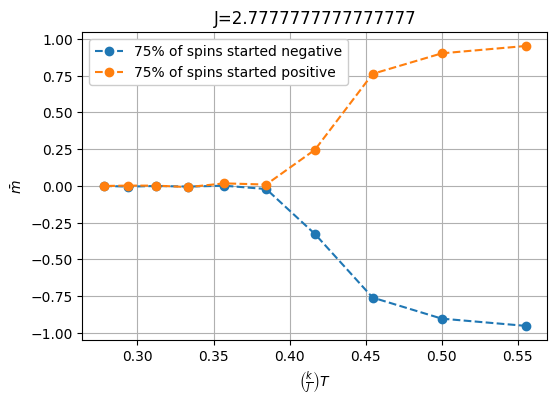

3.3333333333333335
5.0, 5.555555555555555, 6.111111111111111, 6.666666666666667, 7.222222222222222, 7.777777777777778, 8.333333333333334, 8.88888888888889, 9.444444444444445, 10.0
0.6666666666666667, 0.6000000000000001, 0.5454545454545455, 0.5, 0.46153846153846156, 0.4285714285714286, 0.39999999999999997, 0.375, 0.35294117647058826, 0.33333333333333337


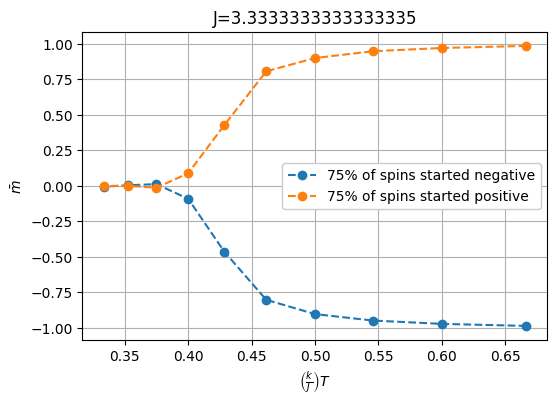

3.8888888888888893
5.0, 5.555555555555555, 6.111111111111111, 6.666666666666667, 7.222222222222222, 7.777777777777778, 8.333333333333334, 8.88888888888889, 9.444444444444445, 10.0
0.7777777777777779, 0.7000000000000001, 0.6363636363636365, 0.5833333333333334, 0.5384615384615385, 0.5000000000000001, 0.4666666666666667, 0.4375, 0.411764705882353, 0.38888888888888895


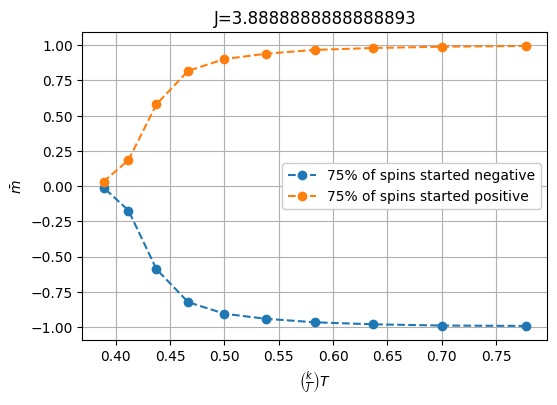

4.444444444444445
5.0, 5.555555555555555, 6.111111111111111, 6.666666666666667, 7.222222222222222, 7.777777777777778, 8.333333333333334, 8.88888888888889, 9.444444444444445, 10.0
0.888888888888889, 0.8, 0.7272727272727274, 0.6666666666666666, 0.6153846153846154, 0.5714285714285715, 0.5333333333333333, 0.5, 0.47058823529411764, 0.4444444444444445


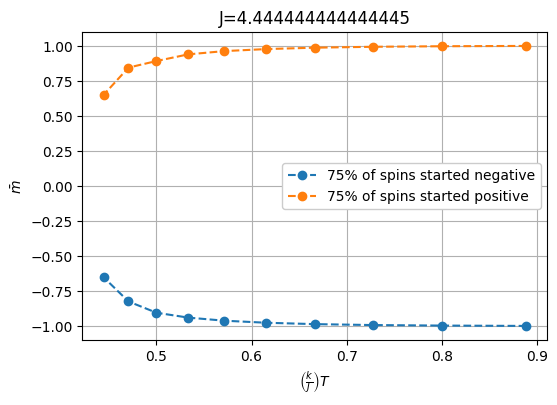

5.0
5.0, 5.555555555555555, 6.111111111111111, 6.666666666666667, 7.222222222222222, 7.777777777777778, 8.333333333333334, 8.88888888888889, 9.444444444444445, 10.0
1.0, 0.9, 0.8181818181818182, 0.75, 0.6923076923076923, 0.6428571428571429, 0.6, 0.5625, 0.5294117647058824, 0.5


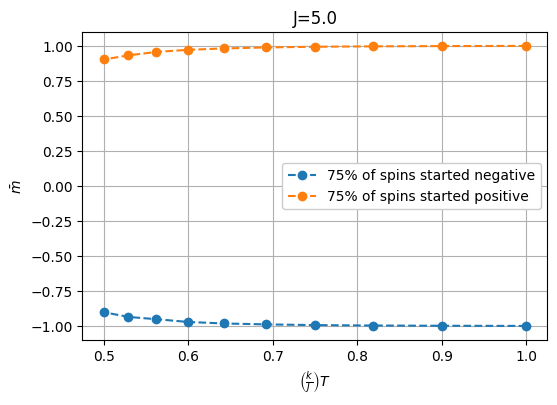

In [50]:
import matplotlib.pyplot as plt

# Iterate through results and create separate plots for each J
for result in results:
    J = result['J']
    B_range = result['B_range']
    spins_avg_n = result['spins_avg_n']
    spins_avg_p = result['spins_avg_p']
    print(J)
    print(*B_range, sep=', ')
    BJs = J / B_range
    print(*BJs, sep=', ')
    
    # Create a new figure for each value of J
    plt.figure(figsize=(6, 4))  # Adjust size as needed
    
    # Plot spins_avg_n and spins_avg_p on the same graph
    plt.plot(BJs, spins_avg_n, 'o--', label=f'75% of spins started negative')
    plt.plot(BJs, spins_avg_p, 'o--', label=f'75% of spins started positive')
    
    plt.xlabel(r'$\left(\frac{k}{J}\right)T$')
    plt.ylabel(r'$\bar{m}$')
    plt.title(f'J={J}')
    plt.legend(facecolor='white', framealpha=1)
    plt.grid(True)
    
    # Show each plot
    plt.show()
